IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings #import warning is to ignoring any warning to keep the esthetic.
warnings.simplefilter("ignore")

LOAD DATASET

In [2]:
df = pd.read_csv('/kaggle/input/student-study-performance/study_performance.csv')

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


EXPLORATORY DATA ANALYSIS

Understanding dataframe

In [3]:
print(f"Shape of dataset is: {df.shape}")

Shape of dataset is: (1000, 8)


Checking the missing value

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Describing data for statistical stuff.

In [5]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Checking data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Okay, the data is seems to be clear :D

Checking the outliers

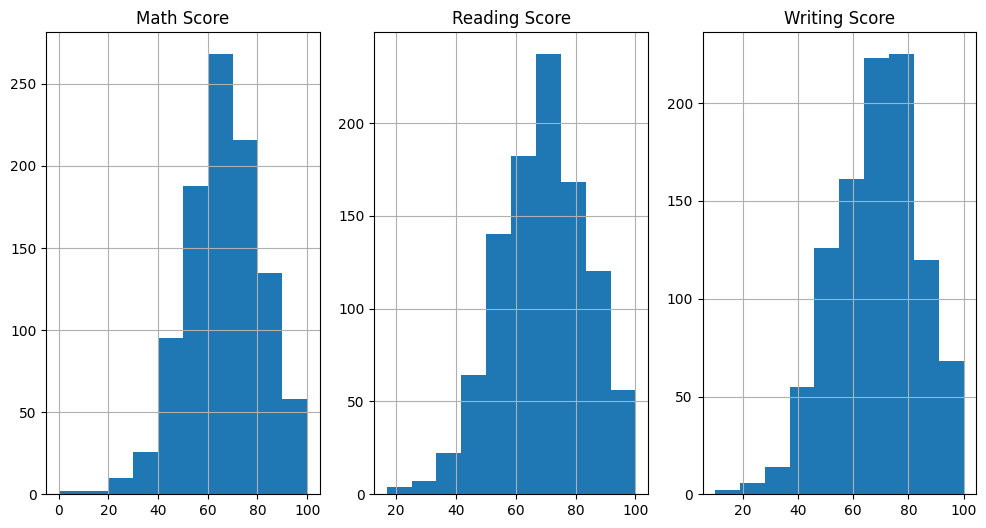

In [7]:
# plot histograms for numerical columns

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
df['math_score'].hist()
plt.title('Math Score')

plt.subplot(1,3,2)
df['reading_score'].hist()
plt.title('Reading Score')

plt.subplot(1,3,3)
df['writing_score'].hist()
plt.title('Writing Score')

plt.show()

Detect outliers using z-score method

In [8]:

# calculate z-scores for eaach numerical column ((score-mean_score)/std_score)
z_scores_math = np.abs((df['math_score'] - df['math_score'].mean())
                       / df['math_score'].std())
z_scores_reading = np.abs((df['reading_score'] - df['reading_score'].mean())
                       / df['reading_score'].std())
z_scores_writing = np.abs((df['writing_score'] - df['writing_score'].mean())
                       / df['writing_score'].std())


# define threshold for outliers
threshold = 3

#identify outliers
outliers_math = df[z_scores_math > threshold]
outliers_reading = df[z_scores_reading > threshold]
outliers_writing = df[z_scores_writing > threshold]
# print number of outliers
print("Number of outliers in Math Score: ", len(outliers_math))
print("Number of outliers in Reading Score: ", len(outliers_reading))
print("Number of outliers in Writing Score: ", len(outliers_writing))

print('\n\n')

#print outliers
print("Outliers in Math Score: ")
print(outliers_math)

print('\n\n')

print("Outliers in Reading Score: ")
print(outliers_reading)

print('\n\n')

print("Outliers in Writing Score: ")
print(outliers_writing)

print('\n\n')

Number of outliers in Math Score:  4
Number of outliers in Reading Score:  4
Number of outliers in Writing Score:  4



Outliers in Math Score: 
     gender race_ethnicity parental_level_of_education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
787  female        group B                some college      standard   
980  female        group B                 high school  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
17                     none          18             32             28  
59                     none           0             17             10  
787                    none          19             38             32  
980                    none           8             24             23  



Outliers in Reading Score: 
     gender race_ethnicity parental_level_of_education         lunch  \
59   female        group C     

Handling outliers

In [9]:
# handle outliers (by removing it)
df = df[(z_scores_math <= threshold) & 
        (z_scores_reading <= threshold) & 
        (z_scores_writing <= threshold)]

print(df)

     gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none          72             72         

Visualize data without outliers

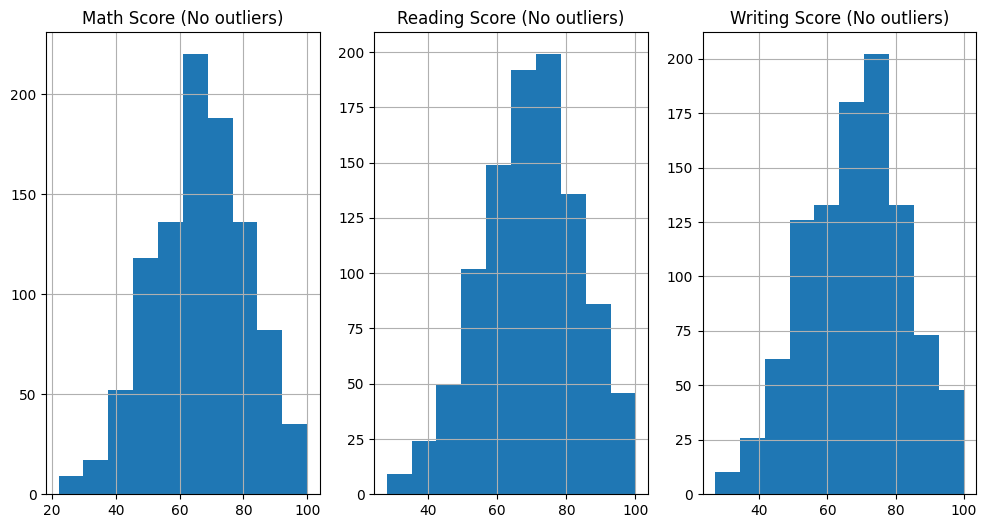

In [10]:
# visualize the data without outliers

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
df['math_score'].hist()
plt.title('Math Score (No outliers)')

plt.subplot(1,3,2)
df['reading_score'].hist()
plt.title('Reading Score (No outliers)')

plt.subplot(1,3,3)
df['writing_score'].hist()
plt.title('Writing Score (No outliers)')

plt.show()

Checking summary statistics after removing the outliers.

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,993.000000,993.000000,993.000000
mean,66.420947,69.471299,68.383686
std,14.661917,14.188799,14.719241
min,22.000000,28.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


Checking data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       993 non-null    object
 1   race_ethnicity               993 non-null    object
 2   parental_level_of_education  993 non-null    object
 3   lunch                        993 non-null    object
 4   test_preparation_course      993 non-null    object
 5   math_score                   993 non-null    int64 
 6   reading_score                993 non-null    int64 
 7   writing_score                993 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 69.8+ KB


DATA VISUALIZATION

Distribution of male and female students

In [13]:
df['gender'].value_counts().sort_index(ascending=False)

gender
male      479
female    514
Name: count, dtype: int64

Range scores in math, reading, and writing

Text(0.5, 0, 'Subjects')

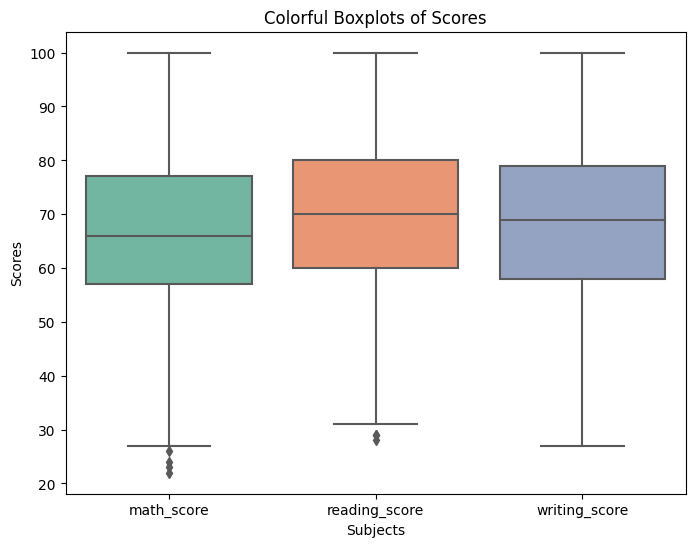

In [14]:
plt.figure(figsize=(8,6))

# Melt the dataframe to a long format for Seaborn
df_melted = df[['math_score','reading_score', 'writing_score']].melt(var_name='Subject', value_name='Score')

# Create a colorful boxplot using Seaborn
sns.boxplot(x='Subject', y='Score', data=df_melted, palette='Set2')  # Use a Seaborn color palette

# Optional: Customize plot appearance
plt.title('Colorful Boxplots of Scores')
plt.ylabel('Scores')
plt.xlabel('Subjects')

Relationship between math, reading, and writing scores

(0.0, 105.0)

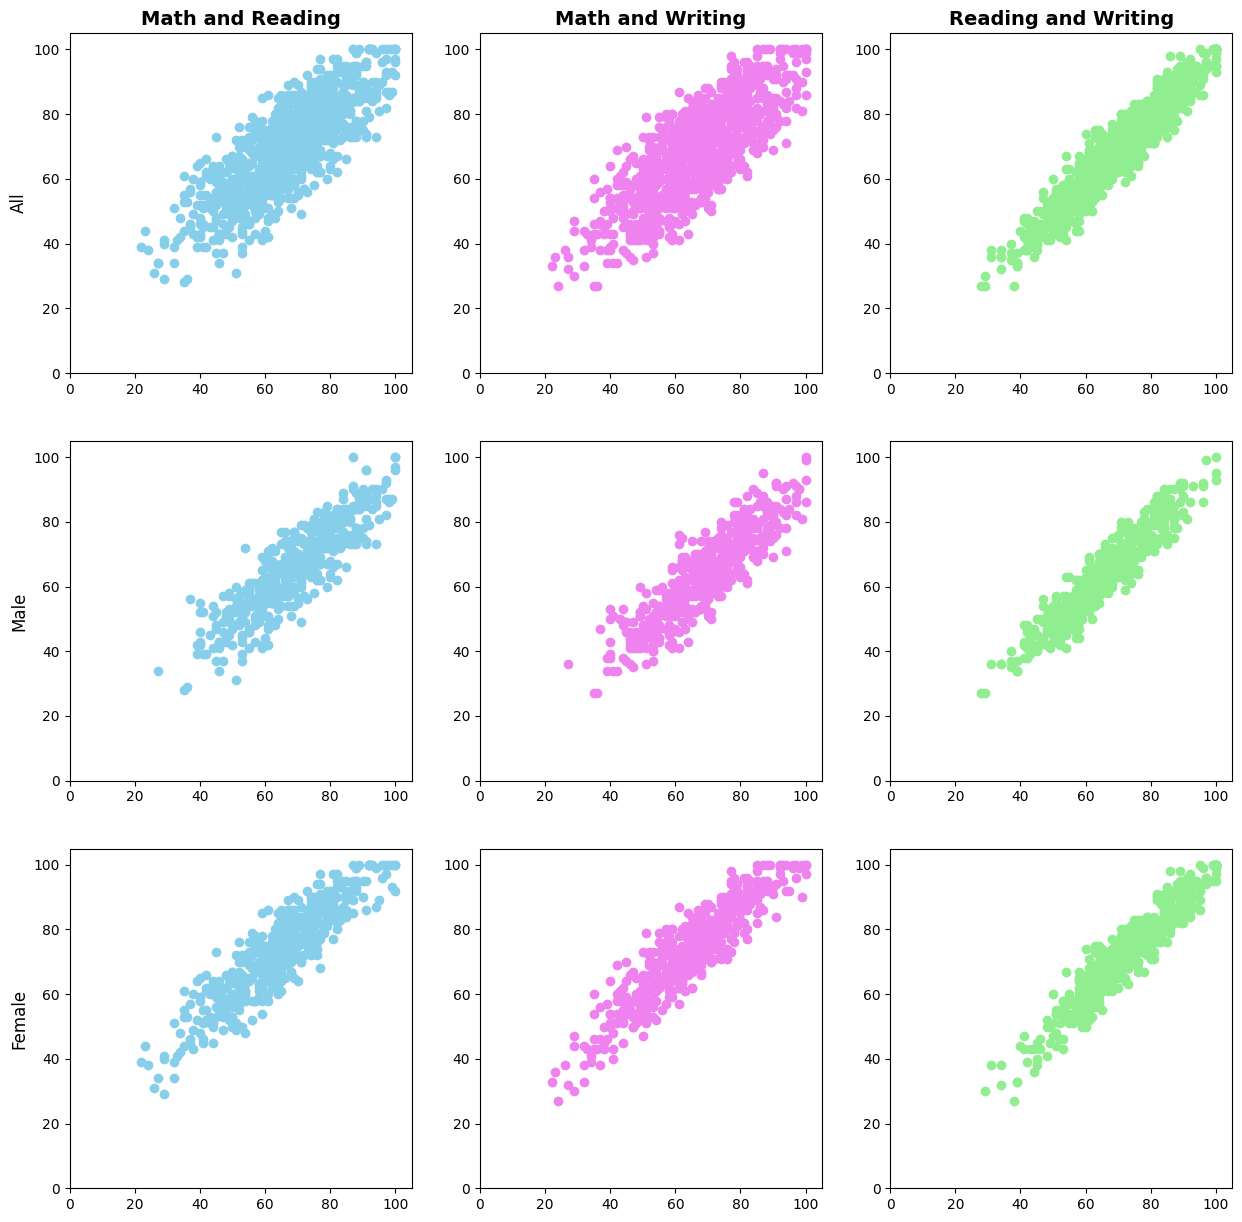

In [15]:
# create a scatter plot
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.scatter(df['math_score'],
            df['reading_score'],
            color='skyblue',
            label='Math vs Reading')
plt.xlim(0, 105)
plt.ylim(0, 105)

plt.ylabel('All', fontsize=12)
plt.title('Math and Reading', fontsize=14, weight='bold')

plt.subplot(3,3,2)
plt.scatter(df['math_score'],
            df['writing_score'],
            color='violet',
            label='Math vs Writing')
plt.xlim(0, 105)
plt.ylim(0, 105)

plt.title('Math and Writing', fontsize=14, weight='bold')

plt.subplot(3,3,3)
plt.scatter(df['reading_score'],
            df['writing_score'],
            color='lightgreen',
            label='Reading vs Writing')
plt.xlim(0, 105)
plt.ylim(0, 105)

plt.title('Reading and Writing', fontsize=14, weight='bold')
#-------------------------------------------------------------------------
plt.subplot(3,3,4)
plt.scatter(df[df['gender']=='male']['math_score'],
            df[df['gender']=='male']['reading_score'],
            color='skyblue',
            label='Math vs Reading')
plt.xlim(0, 105)
plt.ylim(0, 105)

plt.ylabel('Male', fontsize=12)

plt.subplot(3,3,5)
plt.scatter(df[df['gender']=='male']['math_score'],
            df[df['gender']=='male']['writing_score'],
            color='violet',
            label='Math vs Writing')
plt.xlim(0, 105)
plt.ylim(0, 105)

plt.subplot(3,3,6)
plt.scatter(df[df['gender']=='male']['reading_score'],
            df[df['gender']=='male']['writing_score'],
            color='lightgreen',
            label='Reading vs Writing')
plt.xlim(0, 105)
plt.ylim(0, 105)
#--------------------------------------------------------
plt.subplot(3,3,7)
plt.scatter(df[df['gender']=='female']['math_score'],
            df[df['gender']=='female']['reading_score'],
            color='skyblue',
            label='Math vs Reading')
plt.xlim(0, 105)
plt.ylim(0, 105)

plt.ylabel('Female', fontsize=12)

plt.subplot(3,3,8)
plt.scatter(df[df['gender']=='female']['math_score'],
            df[df['gender']=='female']['writing_score'],
            color='violet',
            label='Math vs Writing')
plt.xlim(0, 105)
plt.ylim(0, 105)


plt.subplot(3,3,9)
plt.scatter(df[df['gender']=='female']['reading_score'],
            df[df['gender']=='female']['writing_score'],
            color='lightgreen',
            label='Reading vs Writing')
plt.xlim(0, 105)
plt.ylim(0, 105)


<Axes: >

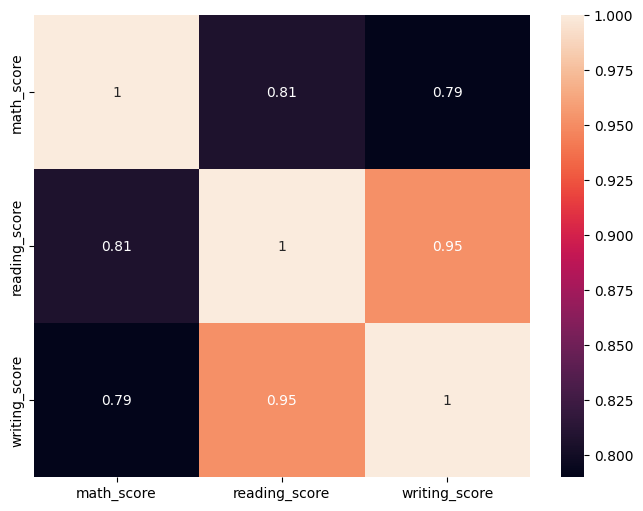

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score']].corr(), annot=True)

This is for male correlation.

<Axes: >

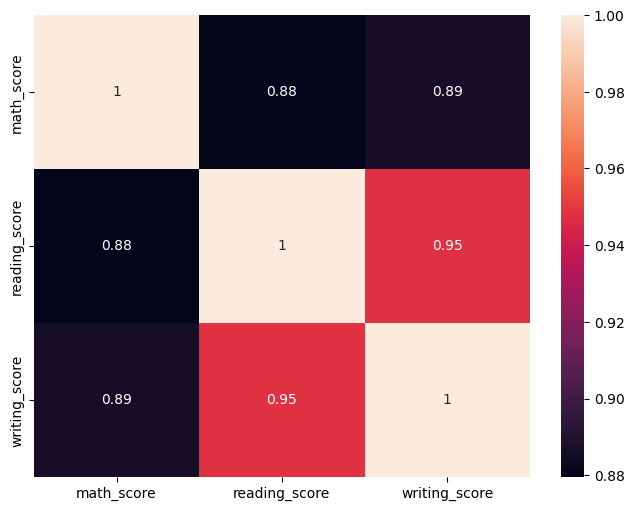

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[df['gender']== 'male'][['math_score', 'reading_score', 'writing_score']].corr(), annot=True)

And this is for female correlation.

<Axes: >

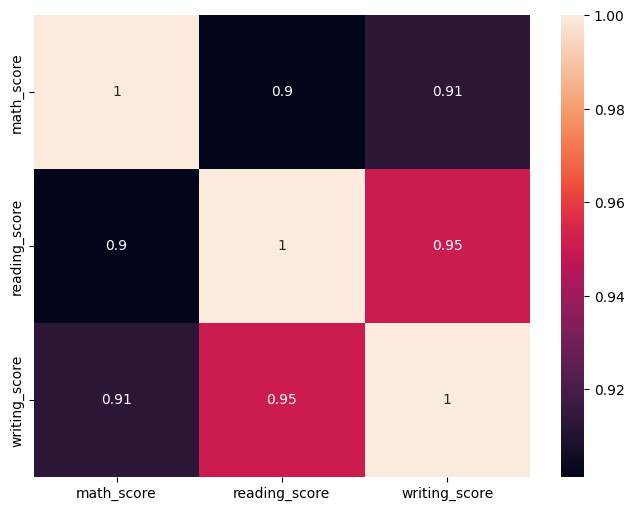

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[df['gender']== 'female'][['math_score', 'reading_score', 'writing_score']].corr(), annot=True)

It shows that there are linear correlation between those score: math, reading, and writing: student that have high score in one subject tend to have high score in another subject.

Calculate mean, median, and mode for math, reading, and writing scores

In [19]:
# calculate mean, median, mode, and standard deviation for math scores
math_mean = df['math_score'].mean()
math_median = df['math_score'].median()
math_mode = df['math_score'].mode().iloc[0] #iloc[0] is to pict just one/the most
math_std = df['math_score'].std()

# calculate mean, median, mode, and standard deviation for reading scores
reading_mean = df['reading_score'].mean()
reading_median = df['reading_score'].median()
reading_mode = df['reading_score'].mode().iloc[0]
reading_std = df['reading_score'].std()

# calculate mean, median, mode, and standard deviation for writing scores
writing_mean = df['writing_score'].mean()
writing_median = df['writing_score'].median()
writing_mode = df['writing_score'].mode().iloc[0]
writing_std = df['writing_score'].std()

# print the results
print("Math Scores")
print("Mean:", math_mean)
print("Median:", math_median)
print("Mode:", math_mode)
print("Standard deviation: {:.2f}".format(math_std))
print()
print("Reading Scores")
print("Mean:", reading_mean)
print("Median:", reading_median)
print("Mode:", reading_mode)
print("Standard deviation: {:.2f}".format(reading_std))
print()
print("Writing Scores")
print("Mean:", writing_mean)
print("Median:", writing_median)
print("Mode:", writing_mode)
print("Standard deviation: {:.2f}".format(writing_std))
print()

Math Scores
Mean: 66.42094662638469
Median: 66.0
Mode: 65
Standard deviation: 14.66

Reading Scores
Mean: 69.47129909365559
Median: 70.0
Mode: 72
Standard deviation: 14.19

Writing Scores
Mean: 68.38368580060423
Median: 69.0
Mode: 74
Standard deviation: 14.72



Performing T-test: Male and female students performance in math, reading, writing

In [20]:
from scipy.stats import ttest_ind

# separate scores for male female students
male_math_scores = df[df['gender'] == 'male']['math_score']
female_math_scores = df[df['gender'] == 'female']['math_score']

male_reading_scores = df[df['gender'] == 'male']['reading_score']
female_reading_scores = df[df['gender'] == 'female']['reading_score']

male_writing_scores = df[df['gender'] == 'male']['writing_score']
female_writing_scores = df[df['gender'] == 'female']['writing_score']

# perform t-test for math scores
math_t_stat, math_p_value = ttest_ind(male_math_scores, female_math_scores)

# perform t-test for reading scores
reading_t_stat, reading_p_value = ttest_ind(male_reading_scores, female_reading_scores)

# perform t-test for writing scores
writing_t_stat, writing_p_value = ttest_ind(male_writing_scores, female_writing_scores)

# print the result
print("Math Scores")
print("t-statistic: ", math_t_stat)
print("p-value: ", math_p_value)

if math_p_value < 0.05: #significancy indicator
    print("There is a significant difference between male and female student's math scores.")
else :
    print("There is no significant difference between male and female student's math scores.")
print()

print("Reading Scores")
print("t-statistic: ", reading_t_stat)
print("p-value: ", reading_p_value)

if reading_p_value < 0.05: #significancy indicator
    print("There is a significant difference between male and female student's reading scores.")
else :
    print("There is no significant difference between male and female student's reading scores.")
print()

print("Writing Scores")
print("t-statistic: ", writing_t_stat)
print("p-value: ", writing_p_value)

if writing_p_value < 0.05: #significancy indicator
    print("There is a significant difference between male and female student's writing scores.")
else :
    print("There is no significant difference between male and female student's writing scores.")



Math Scores
t-statistic:  5.3728815434396235
p-value:  9.659440692212029e-08
There is a significant difference between male and female student's math scores.

Reading Scores
t-statistic:  -8.288850526996868
p-value:  3.690837434964665e-16
There is a significant difference between male and female student's reading scores.

Writing Scores
t-statistic:  -10.429598182950096
p-value:  3.0933252786574677e-24
There is a significant difference between male and female student's writing scores.
